# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-08-13 17:00:39.026468


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 8/12/20


,8/12/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,5197118,166026,3.19
Brazil,3164785,104201,3.29
Mexico,498380,54666,10.97
India,2396637,47033,1.96
United Kingdom,315581,46791,14.83
Italy,251713,35225,13.99
France,244088,30375,12.44


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 8/12/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
35289,US,5094400,2020-08-10,163463.0,525.0,49536.0,54408.571429
35288,US,5044864,2020-08-09,162938.0,515.0,46935.0,53813.142857
35287,US,4997929,2020-08-08,162423.0,1076.0,56174.0,53905.285714
35286,US,4941755,2020-08-07,161347.0,1243.0,58173.0,54235.428571
35285,US,4883582,2020-08-06,160104.0,1250.0,59692.0,55509.571429
35284,US,4823890,2020-08-05,158854.0,1372.0,52810.0,56701.142857
35283,US,4771080,2020-08-04,157482.0,1378.0,57540.0,59267.714286


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 8/12/20


,8/12/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,422703,32797.0,7.76
New Jersey,185938,15885.0,8.54
California,591376,10753.0,1.82
Texas,523977,9527.0,1.82
Florida,550901,8765.0,1.59
Massachusetts,121707,8751.0,7.19
Illinois,199893,7881.0,3.94


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 8/12/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1221,California,574231,2020-08-10,10476.0,99.0,14485.0,8197.142857
1220,California,559746,2020-08-09,10377.0,70.0,5358.0,6795.857143
1219,California,554388,2020-08-08,10307.0,174.0,7574.0,6825.000000
1218,California,546814,2020-08-07,10133.0,112.0,5475.0,6608.285714
1217,California,541339,2020-08-06,10021.0,213.0,10733.0,6915.000000
1216,California,530606,2020-08-05,9808.0,124.0,3921.0,6527.571429
1215,California,526685,2020-08-04,9684.0,243.0,9834.0,7989.000000


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 8/12/20


,8/12/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,214283,5112.0,2.39
Riverside,43376,824.0,1.90
Orange,41823,745.0,1.78
San Diego,33157,602.0,1.82
San Bernardino,38290,555.0,1.45
Imperial,9919,252.0,2.54
San Joaquin,13870,235.0,1.69


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 8/12/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3873,Los Angeles,210543,2020-08-10,4998.0,21.0,1980.0,2380.857143
3872,Los Angeles,208563,2020-08-09,4977.0,10.0,1785.0,2340.857143
3871,Los Angeles,206778,2020-08-08,4967.0,48.0,2520.0,2274.428571
3870,Los Angeles,204258,2020-08-07,4919.0,50.0,3058.0,2245.285714
3869,Los Angeles,201200,2020-08-06,4869.0,42.0,3035.0,2166.285714
3868,Los Angeles,198165,2020-08-05,4827.0,67.0,2360.0,2101.285714
3867,Los Angeles,195805,2020-08-04,4760.0,58.0,1928.0,2451.857143
3866,Los Angeles,193877,2020-08-03,4702.0,9.0,1700.0,2549.857143
3865,Los Angeles,192177,2020-08-02,4693.0,24.0,1320.0,2594.285714
3864,Los Angeles,190857,2020-08-01,4669.0,45.0,2316.0,2647.428571



7 day new US cases as of 8/12/20


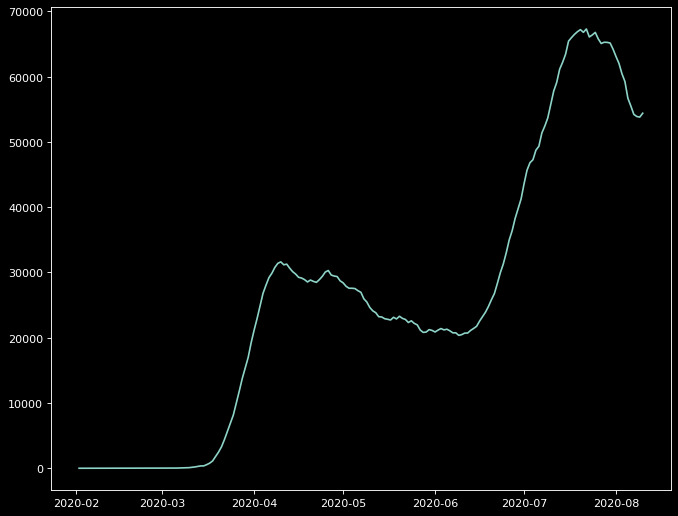

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 8/12/20


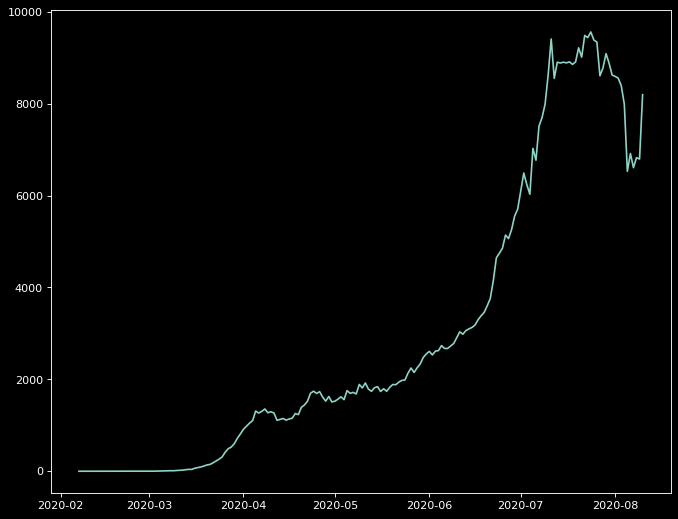

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 8/12/20


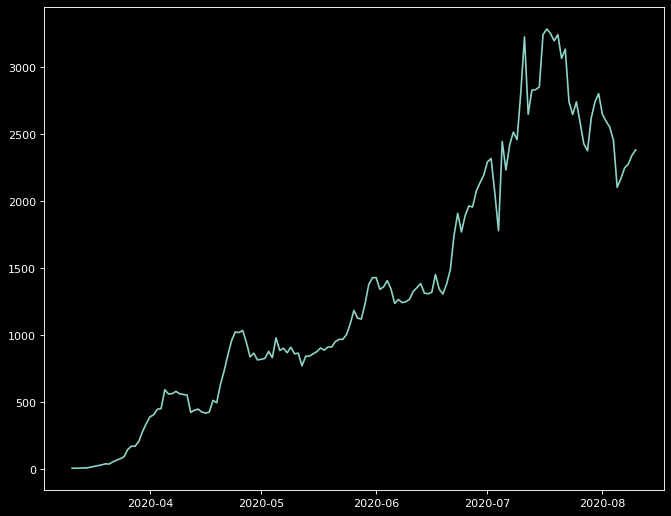

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()